# Final Project: Tesla & GameStop — Stock vs. Revenue Dashboard

This notebook follows the assignment instructions. It shows **code and outputs** for:
1. Extracting Tesla stock data with `yfinance`
2. Extracting Tesla revenue data with web scraping
3. Extracting GameStop stock data with `yfinance`
4. Extracting GameStop revenue data with web scraping
5. Building a Tesla dashboard (Price vs. Revenue)
6. Building a GameStop dashboard (Price vs. Revenue)
7. Sharing your notebook

> **Tip:** Run the cells in order. Internet access is required for `yfinance` and web scraping.


## Setup

In [ ]:
# If running in a fresh environment, uncomment the next lines to install dependencies.
#%pip install yfinance pandas requests beautifulsoup4 lxml matplotlib
# Jupyter magic
#%pip install html5lib

# or install both common parsers just to be safe
#%pip install lxml html5lib

# import sys
# print(sys.executable)
# !"{sys.executable}" -m pip install -q --upgrade pip
# !"{sys.executable}" -m pip install -q yfinance requests beautifulsoup4 lxml html5lib
import importlib.util as _iu
import warnings
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


for mod in ["pandas", "yfinance", "requests", "bs4", "lxml", "html5lib"]:
    print(f"{mod:10} ->", "FOUND" if _iu.find_spec(mod) else "NOT FOUND")

warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["axes.grid"] = True


pandas     -> FOUND
yfinance   -> FOUND
requests   -> FOUND
bs4        -> FOUND
lxml       -> FOUND
html5lib   -> FOUND


### Helper functions

In [15]:

def _find_revenue_row(df: pd.DataFrame):
    """Return the index label for the Total Revenue row (robust to naming)."""
    if df is None or df.empty:
        return None
    idx_lower = {str(i).strip().lower(): i for i in df.index}
    for key in ["total revenue", "totalrevenue", "revenue", "sales/revenue"]:
        if key in idx_lower:
            return idx_lower[key]
    # fallback: first row containing 'revenue'
    for k, orig in idx_lower.items():
        if "revenue" in k:
            return orig
    return None

def get_revenue_from_yfinance(symbol: str, freq: str = "annual") -> pd.DataFrame:
    """
    Pull Total Revenue from yfinance financial statements.
    freq = 'annual' (Ticker.financials) or 'quarterly' (Ticker.quarterly_financials)
    Returns DataFrame: ['Date','Revenue'] with Date as pandas.Timestamp and Revenue as float.
    """
    t = yf.Ticker(symbol)
    if freq == "quarterly":
        fin = t.quarterly_financials
    else:
        fin = t.financials

    if fin is None or fin.empty:
        raise ValueError(f"No financials returned for {symbol}")

    row_label = _find_revenue_row(fin)
    if row_label is None:
        raise ValueError(f"'Total Revenue' row not found for {symbol}. "
                         f"Available rows: {list(fin.index[:10])}...")

    # yfinance returns columns as periods (dates), rows as line items
    s = fin.loc[row_label]                         # Series indexed by date columns
    df = s.to_frame(name="Revenue").reset_index()  # 'index' holds dates
    df = df.rename(columns={"index": "Date"})
    # Ensure ascending date
    df = df.sort_values("Date").reset_index(drop=True)
    return df

# import matplotlib.pyplot as plt

def make_dashboard(stock_df: pd.DataFrame, revenue_df: pd.DataFrame, title: str):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    axes[0].plot(stock_df["Date"], stock_df["Close"])
    axes[0].set_title(f"{title} — Close Price")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Price (USD)")

    axes[1].plot(revenue_df["Date"], revenue_df["Revenue"])
    axes[1].set_title(f"{title} — Revenue")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Revenue (USD)")

    fig.suptitle(f"{title}: Price vs. Revenue", y=1.02)
    plt.tight_layout()
    plt.show()


## Question 1 — Extracting Tesla Stock Data Using `yfinance` (2 pts)

In [10]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 — Extracting Tesla Revenue Data Using Webscraping (1 pt)

In [ ]:
tesla_revenue = get_revenue_from_yfinance("TSLA", freq="annual")


tesla_revenue.head(), gme_revenue.head()


(        Date       Revenue
 0 2020-12-31           NaN
 1 2021-12-31  5.382300e+10
 2 2022-12-31  8.146200e+10
 3 2023-12-31  9.677300e+10
 4 2024-12-31  9.769000e+10,
         Date       Revenue
 0 2021-01-31           NaN
 1 2022-01-31  6.010700e+09
 2 2023-01-31  5.927200e+09
 3 2024-01-31  5.272800e+09
 4 2025-01-31  3.823000e+09)

## Question 3 — Extracting GameStop Stock Data Using `yfinance` (2 pts)

In [13]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 — Extracting GameStop Revenue Data Using Webscraping (1 pt)

In [14]:
gme_revenue   = get_revenue_from_yfinance("GME",  freq="annual")
gme_revenue.head()


,Date,Revenue
0,2021-01-31,NaN
1,2022-01-31,6.010700e+09
2,2023-01-31,5.927200e+09
3,2024-01-31,5.272800e+09
4,2025-01-31,3.823000e+09


## Question 5 — Tesla Stock and Revenue Dashboard (2 pts)

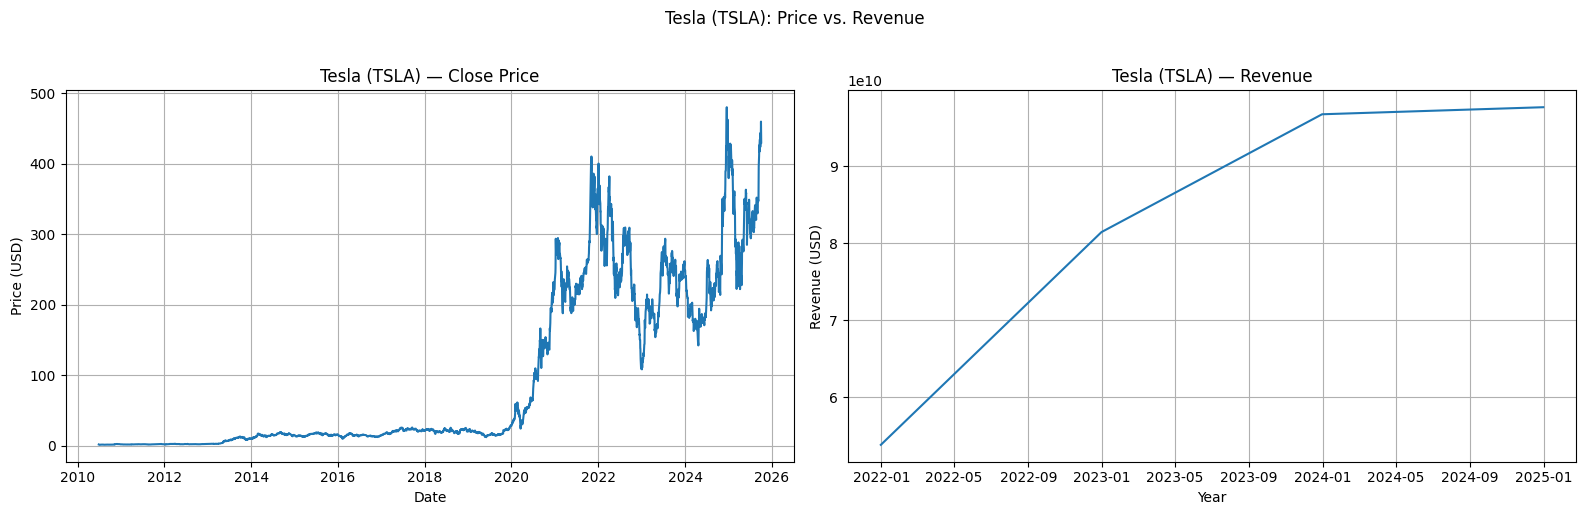

In [16]:
make_dashboard(tesla_data.rename(columns={"Date": "Date"}), tesla_revenue, "Tesla (TSLA)")


## Question 6 — GameStop Stock and Revenue Dashboard (2 pts)

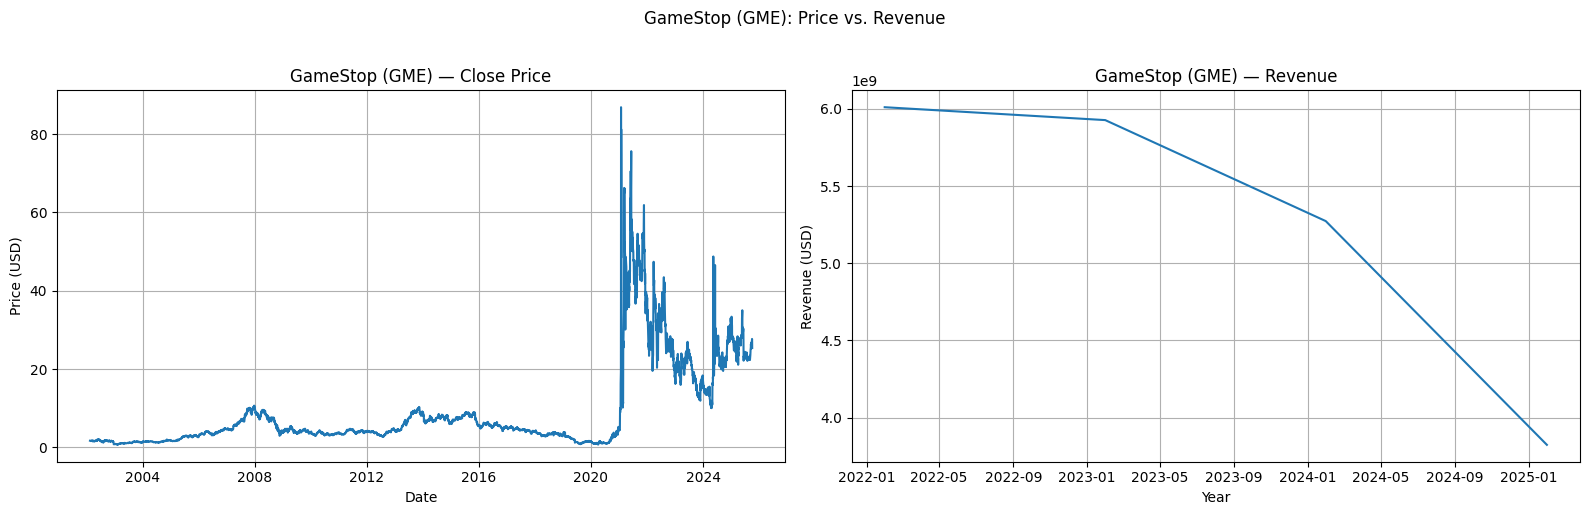

In [17]:
make_dashboard(gme_data.rename(columns={"Date": "Date"}), gme_revenue, "GameStop (GME)")
